<a href="https://colab.research.google.com/github/Eallies/eallies.github.io/blob/main/4suimei_assist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys
from tabulate import tabulate
from google.colab import drive

#ユーザー名のリストを取得（ランタイム切れてるときはまずマウント）
try:
  targetstable = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/targets.csv", index_col=0)
except FileNotFoundError:
  drive.mount('/content/drive')
  targetstable = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/targets.csv", index_col=0)

#@title ユーザー管理
#@markdown #####保存されている生年月日を表示・編集します。

print(tabulate(targetstable,headers = targetstable.columns,tablefmt='simple', showindex=True))

control = input("削除したい場合は「削除」、項目ごとに編集したい場合は「編集」、表示のみの場合は「終了」を記入してください。")
if "終了" in control:
  print("終了します。")
elif "削除" in control:
  choice = input("削除したい名前を記入してください。")
  targetstable = targetstable.drop(index = choice)
  targetstable.to_csv("/content/drive/MyDrive/Colab/4suimeiData/targets.csv")
  print("正常に削除されました。")
elif "編集" in control:
  quitbool = False
  while True:
    if quitbool == True:
      break
    else:
      choice1 = input("編集したい名前を記入してください。")
      if choice1 not in targetstable.index.tolist():
        print("該当する名前がありません。")
        break
      choice2 = input("編集したい項目を記入してください。")
      if choice2 not in targetstable.columns.tolist():
        print("該当する項目がありません。")
        break
      choice = input(f"{choice1}の{choice2}を編集します。編集後の情報を記入してください。")
      targetstable.loc[choice1,choice2] = choice
      changedList = targetstable.loc[choice1].tolist()
      changedtable = [changedList]
      print("編集されました。")
      print(f"編集後の{choice1}さんの情報")
      df_changed = pd.DataFrame(changedtable, index =[choice1], columns = targetstable.columns)
      print(tabulate(df_changed, headers = df_changed.columns,tablefmt='simple', showindex=True))
      choice = input("編集を続けますか？(はい／いいえ)")
      if choice != "はい":
        quitbool = True
  print("編集を終了します。")

Mounted at /content/drive
                  年    月    日    時    分  場所    性別    備考
--------------  ----  ----  ----  ----  ----  ------  ------  ----------------
きよ            1993     7    12    10    58  福岡県  男性    nan
よし            1995    11    11     7    28  福岡県  女性    nan
すずさん        2022     8    19    18    38  大分県  女性    nan
せかぺん        1993     6    21     2     0  福岡県  女性    時刻は推測による
しばくん        1994     3    29     2     0  福岡県  男性    nan
たぐちさん      1993     9    13    14    30  千葉県  女性    nan
ﾜﾀﾘさん         1991     3    28    14     0  栃木県  男性    時刻は推測による
らんしぁ        1999    11    16    11     0  愛知県  男性    nan
チャナさん      1995     7    20    14     0  秋田県  女性    時刻は推測による
おなご殿        1995     9    23    17    59  青森県  女性    nan
たにこうさん    1992     5    30    14    59  熊本県  男性    時刻は推測による
ﾗｲｺさん         1993     4     8    20    59  東京都  女性    時刻は推測による
はは            1968     1     4     8    59  福岡県  女性    時刻は推測による
まふらーさん    1994    11    29     2    59  香川県  女性    時刻は推測による
ほん

まきこさん の命式
      通変星    天干    地支    蔵干本気    通変星    蔵干中気    通変星    蔵干余気    通変星
----  --------  ------  ------  ----------  --------  ----------  --------  ----------  --------
年柱  偏官      壬      午      丁          劫財      ‐                     己          傷官
月柱  偏財      庚      戌      戊          食神      丁          劫財      辛          正財
日柱            丙      子      癸          正官      ‐                     壬          偏官
時柱  比肩      丙      申      庚          偏財      壬          偏官      戊          食神

格　局：正財格
誠実で勤勉に働く銀行マン

身強弱：身強

用神：偏官、正官（水）
喜神：偏財（金）
忌神：偏印、印綬（木）
仇神：比肩（火）

最多五行：火


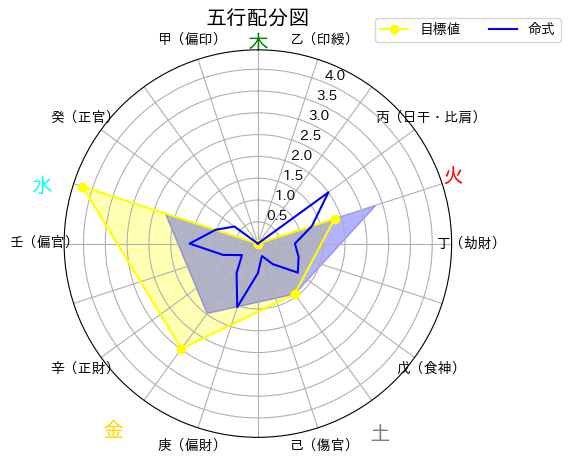

特記事項：日干強弱値：1、格局は月干で判定、忌神は命式に該当なし


大運
  年齢  通変星    天干    地支    蔵干    通変星    運勢
------  --------  ------  ------  ------  --------  ------
     9  傷官      己      酉      辛      正財      吉
    19  食神      戊      申      庚      偏財      吉
    29  劫財      丁      未      己      傷官      凶
    39  比肩      丙      午      丁      劫財      半凶
    49  印綬      乙      巳      丙      比肩      末凶
    59  偏印      甲      辰      戊      食神      小凶
    69  正官      癸      卯      乙      印綬      小凶
    79  偏官      壬      寅      甲      偏印      小凶


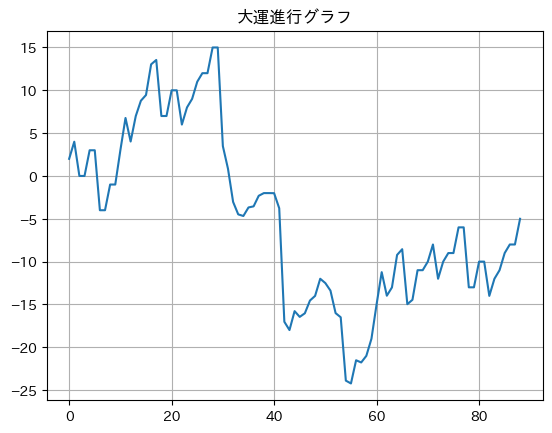

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime
import pytz
import tzlocal
import collections
import itertools
from tabulate import tabulate
from google.colab import drive
#ユーザー名のリストを取得（ランタイム切れてるときはまずマウント）
try:
  targetstable = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/targets.csv", index_col=0)
except FileNotFoundError:
  drive.mount('/content/drive')
  targetstable = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/targets.csv", index_col=0)
import sys
sys.path.append("/content/drive/MyDrive/Colab/4suimeiData/packages/")
import matplotlib.pyplot as plt
import japanize_matplotlib

def sekki(year,month): #当該年月の節分の日を求める関数
  basetime = datetime.datetime(2000,3,20,16,35) #基準時として２０００年の春分の日を利用
  baseyear = 365.2422 #地球の公転周期
  year -= 2000
  syunbun_of_the_year = basetime + datetime.timedelta(minutes= math.ceil(baseyear * year * 24 * 60)) #その年の春分の日
  month -= 3
  if month < 0: #春分以前
    sekki_of_the_month = syunbun_of_the_year + datetime.timedelta(minutes = (-1 + month * 2) * (baseyear-186.5)* 24 * 60 // 12)
  elif month < 7: #春分から秋分
    sekki_of_the_month = syunbun_of_the_year + datetime.timedelta(minutes = (-1 + month * 2) * 186.5 * 24 * 60 // 12)
  else: #秋分以後
    month -= 6
    sekki_of_the_month = syunbun_of_the_year + datetime.timedelta(minutes = ((((-1 + month * 2) * (baseyear-186.5) // 12) + 186.5) * 24 * 60))
  return(sekki_of_the_month)

def jikkan(num):  #十干番号から十干を返す関数
  num %= 10
  a = (("甲", 0,   0, 4),#十干のタプルコンテンツ：十干名、十干番号、五行角度、干合後の干支番号
       ("乙", 1,   0, 7),
       ("丙", 2,  72, 8),
       ("丁", 3,  72, 1),
       ("戊", 4, 144, 2),
       ("己", 5, 144, 5),
       ("庚", 6, 216, 6),
       ("辛", 7, 216, 9),
       ("壬", 8, 288, 0),
       ("癸", 9, 288, 3))
  return(a[num])

def junishi(num):  #番号から十二支を返す関数
  num %= 12
  a = (#十二支のタプルコンテンツ：十二支名、十二支番号(五行と合わせるため寅始まり)、十二支角度（度）、五行角度、蔵干余気十干番号、同中気(なければ-1)、同本気
       ("子", 10, 15,  288, 8, -1, 9),
       ("丑", 11, 45,  144, 9,  7, 5),
       ("寅",  0, 75,    0, 4,  2, 0),
       ("卯",  1, 105,   0, 0, -1, 1),
       ("辰",  2, 135, 144, 1,  9, 4),
       ("巳",  3, 165,  72, 4,  6, 2),
       ("午",  4, 195,  72, 5, -1, 3),
       ("未",  5, 225, 144, 3,  1, 5),
       ("申",  6, 255, 216, 4,  8, 6),
       ("酉",  7, 285, 216, 6, -1, 7),
       ("戌",  8, 315, 144, 7,  3, 4),
       ("亥",  9, 345, 288, 0, -1, 8))
  return(a[num])

tuhenseilib = (#通変星のタプルコンテンツ：通変星名、神名、神角度
("比肩", "比劫",   0),
("劫財", "比劫",   0),
("食神", "食傷",  72),
("傷官", "食傷",  72),
("偏財",   "財", 144),
("正財",   "財", 144),
("偏官", "官殺", 216),
("正官", "官殺", 216),
("偏印",   "印", 288),
("印綬",   "印", 288) )

fivepower = {0:"木" ,72:"火", 144:"土", 216:"金" ,288:"水"} #五行の数値を変換するdict

def tuhensei(day_jikkan,jikkannum): #通変星を求める関数（念のため日干も引数にする）
  a = ((jikkannum[2] - day_jikkan[2] + 360) % 360) // 72
  if day_jikkan[1] % 2 == jikkannum[1] % 2:
    b = 0
  else:
    b = 1
  return(tuhenseilib[a * 2 + b])

#干合を出す関数
def kango(tenkan, chishi, loglist):
  kangoFlags = [1,1,1,1] #干合をフラグ管理するリスト(１は干合せず、‐1が干合)
  for i in range(3):
    if abs(tenkan[i][1] - tenkan[i+1][1]) == 5:
      kangoFlags[i] *= -1 #妬合したら反転して元に戻る
      kangoFlags[i+1] *= -1
  for i in range(4):
    if kangoFlags[i] == -1:
      kango5 = [i[2] for i in tenkan] + [i[3] for i in chishi] #命式全体の5行を集計するリスト
      if tenkan[i][1] == 0 or 5:
        if chishi[1][0] in ["丑辰未戌巳午"] and kango5.count(144) > 3 and kango5.count(288) ==1:
          tenkan[i] = jikkan(tenkan[i][3]) #合化土
          loglist.append(f"{tenkan[i][0]}合化土")
      if tenkan[i][1] == 1 or 6:
        if chishi[1][0] in ["申酉丑辰未戌"] and kango5.count(216) > 3 and kango5.count(72) ==0:
          tenkan[i] = jikkan(tenkan[i][3]) #合化金
          loglist.append(f"{tenkan[i][0]}合化金")
      if tenkan[i][1] == 2 or 7:
        if chishi[1][0] in ["子亥申酉"] and kango5.count(288) > 3 and (kango5.count(144) == 0 or (chishi[1][0] in ["丑辰"] and kango5.count(144) ==1)):
          tenkan[i] = jikkan(tenkan[i][3]) #合化水
          loglist.append(f"{tenkan[i][0]}合化水")
      if tenkan[i][1] == 3 or 8:
        if chishi[1][0] in ["寅卯子亥辰未"] and kango5.count(0) > 3 and kango5.count(216) == 0:
          tenkan[i] = jikkan(tenkan[i][3]) #合化木
          loglist.append(f"{tenkan[i][0]}合化木")
      if tenkan[i][1] == 4 or 9:
        if chishi[1][0] in ["巳午寅卯未戌"] and kango5.count(72) > 3 and kango5.count(288) == 1 :
          tenkan[i] = jikkan(tenkan[i][3]) #合化水
          loglist.append(f"{tenkan[i][0]}合化水")
  return([tenkan, kangoFlags, loglist])
#干合ここまで

def yojin(kakkyoku, kyojaku, tuhensei): #吉凶神を出す関数
  if kakkyoku == "従旺":
    return([tuhenseilib[0],tuhenseilib[8],tuhenseilib[6],tuhenseilib[4]])
  elif kakkyoku == "従強":
    return([tuhenseilib[8],tuhenseilib[0],tuhenseilib[4],tuhenseilib[2]])
  elif kakkyoku == "従児":
    return([tuhenseilib[2],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
  elif kakkyoku == "従財":
    return([tuhenseilib[4],tuhenseilib[2],tuhenseilib[0],tuhenseilib[8]])
  elif kakkyoku == "従殺":
    return([tuhenseilib[6],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
  elif kakkyoku == "従勢":
    return([tuhenseilib[4],tuhenseilib[6],tuhenseilib[0],tuhenseilib[8],tuhenseilib[2]])
  elif kyojaku == "身弱":
    if tuhensei == "官殺":
      return([tuhenseilib[8],tuhenseilib[0],tuhenseilib[4],tuhenseilib[2]])
    elif tuhensei == "財":
      return([tuhenseilib[0],tuhenseilib[8],tuhenseilib[6],tuhenseilib[4]])
    else:#食傷の場合
      return([tuhenseilib[8],tuhenseilib[0],tuhenseilib[4],tuhenseilib[2]])
  else:
    if kakkyoku == "食神" or kakkyoku == "傷官" or kakkyoku == "偏財" or kakkyoku == "正財":
      if tuhensei == "比劫":
        return([tuhenseilib[2],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
      elif tuhensei == "印":
        return([tuhenseilib[4],tuhenseilib[2],tuhenseilib[0],tuhenseilib[8]])
      elif tuhensei == "食傷":
        return([tuhenseilib[4],tuhenseilib[6],tuhenseilib[0],tuhenseilib[8]])
      elif tuhensei == "財":
        return([tuhenseilib[6],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
      else:#官殺の場合
        return([tuhenseilib[2],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
    else:
      if tuhensei == "比劫":
        return([tuhenseilib[6],tuhenseilib[4],tuhenseilib[0],tuhenseilib[8]])
      elif tuhensei == "印":
        return([tuhenseilib[4],tuhenseilib[2],tuhenseilib[0],tuhenseilib[8]])
      elif tuhensei == "食傷":
        return([tuhenseilib[4],tuhenseilib[6],tuhenseilib[0],tuhenseilib[8]])
      elif tuhensei == "財":
        return([tuhenseilib[6],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])
      else:
        return([tuhenseilib[2],tuhenseilib[4],tuhenseilib[8],tuhenseilib[0]])

def zokan(gesshi, nissu):#蔵干深浅を図る関数
  if gesshi[0] == "寅":
    if nissu <= 7:
      return(jikkan(4))
    elif nissu <= 14:
      return(jikkan(2))
    else:
      return(jikkan(0))
  elif gesshi[0] == "卯":
    if nissu <= 10:
      return(jikkan(0))
    else:
      return(jikkan(1))
  elif gesshi[0] == "辰":
    if nissu <= 9:
      return(jikkan(1))
    elif nissu <= 12:
      return(jikkan(9))
    else:
      return(jikkan(4))
  elif gesshi[0] == "巳":
    if nissu <= 7:
      return(jikkan(4))
    elif nissu <= 16:
      return(jikkan(6))
    else:
      return(jikkan(2))
  elif gesshi[0] == "午":
    if nissu <= 9:
      return(jikkan(5))
    else:
      return(jikkan(3))
  elif gesshi[0] == "未":
    if nissu <= 9:
      return(jikkan(3))
    elif nissu <= 12:
      return(jikkan(1))
    else:
      return(jikkan(5))
  elif gesshi[0] == "申":
    if nissu <= 7:
      return(jikkan(4))
    elif nissu <= 14:
      return(jikkan(8))
    else:
      return(jikkan(6))
  elif gesshi[0] == "酉":
    if nissu <= 10:
      return(jikkan(6))
    else:
      return(jikkan(7))
  elif gesshi[0] == "戌":
    if nissu <= 9:
      return(jikkan(7))
    elif nissu <= 12:
      return(jikkan(3))
    else:
      return(jikkan(4))
  elif gesshi[0] == "亥":
    if nissu <= 10:
      return(jikkan(0))
    else:
      return(jikkan(8))
  elif gesshi[0] == "子":
    if nissu <= 10:
      return(jikkan(8))
    else:
      return(jikkan(9))
  elif gesshi[0] == "丑":
    if nissu <= 9:
      return(jikkan(9))
    elif nissu <= 12:
      return(jikkan(7))
    else:
      return(jikkan(5))

#会局の有無を調べる
kaikyokulib = (#会局のタプルコンテンツ：会局名、五行角度、構成十二支
    ("三方木局",   0, junishi(2),  junishi(3), junishi(4)),
    ("三方火局",  72, junishi(5),  junishi(6), junishi(7)),
    ("三方金局", 216, junishi(8),  junishi(9), junishi(10)),
    ("三方水局", 288, junishi(11), junishi(0), junishi(1)),
    ("三合木局",   0, junishi(3),  junishi(7), junishi(11)),
    ("三合火局",  72, junishi(2),  junishi(6), junishi(10)),
    ("三合金局", 216, junishi(1),  junishi(5), junishi(9)),
    ("三合水局", 288, junishi(0),  junishi(4), junishi(8)),
    ("四墓土局", 144, junishi(1),  junishi(4), junishi(7), junishi(10)))

def kikkyo(tenkan_jikkan, chishi_jikkan, kamilist): #吉凶判定の数値を出す関数
  kikkyo_tuhensei = [tuhensei(tenkan[2], tenkan_jikkan), tuhensei(tenkan[2], chishi_jikkan)]
  for i in kamilist: #神が二つの時は少ない方を消す
    if len(i) == 2:
      del(i[1])
  a = 0 #吉凶の数値を入れる
  for i in range(2):
    b = kikkyo_tuhensei[i][2]
    if b == kamilist[0][0][2]:
      a += 2 * (i + 1)
    elif b == kamilist[1][0][2]:
      a += 1 * (i + 1)
    elif b == kamilist[2][0][2]:
      a += -2 * (i + 1)
    elif b == kamilist[3][0][2]:
      a += -1 * (i + 1)
    else:
      a += 0
  if a == 6:
    b = "大吉"
  elif a == -6:
    b ="大凶"
  elif a == 0:
    b ="和"
  elif a >= 4:
    b ="中吉"
  elif a <= -4:
    b ="末凶"
  elif a == 3:
    b ="小吉"
  elif a == -3:
    b ="半凶"
  elif a == 2:
    b ="吉"
  elif a == -2:
    b ="小凶"
  elif a == 1:
    b ="末吉"
  else:
    b ="凶"
  return([b,a])

def typewrite(table, rowname, column, allowprint, index_num = -1): #csvファイルから説明文を呼び出して出力する関数
  table = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/{table}.csv", index_col=0)
  original = table.loc[rowname, column]
  if index_num != -1:
    original = original.iloc[index_num]
  if original == "":
    return(0)
  else:
    text = original.split("\n")
    if allowprint == True: #即時出力を求められればそのまま出力
      for i in text:
        print(i)
    else: #即時出力でないときは、単一行なら文字列、複数行ならリストで返す
      if len(text) ==1:
        return(text[0])
      else:
        return(text)

#ここが入力欄
#@title 四柱推命判定
year = 1993 #@param{type:"number"}
month = "6" #@param[1,2,3,4,5,6,7,8,9,10,11,12]{allow-input:false}
day = "21" #@param[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]{allow-input:false}
hour = "1" #@param["出生時刻不明",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]{allow-input:false}
minute = 30 #@param{type:"number"}
birthplace = "\u5CF6\u6839"#@param{type:"string"}
#@markdown #####出生地を都道府県（漢字）で記入してください。
sex = "\u7537\u6027"#@param ["男性", "女性"]{allow-input:false}
#@markdown
#@markdown #####保存済みの人の場合、以下に名前を記入してください（上は無視されます）。
name_of_person = "\u307E\u304D\u3053\u3055\u3093"#@param{type:"string"}
#@markdown
#@markdown #####「出生時刻不明」の場合、次の中で最も当てはまる数字を選んでください（これによる結果はやや不正確なものとなる可能性があります。）
#@markdown #####１：つむじが体の正中線上にある。または仰向けに寝ることが多い
#@markdown #####２：つむじが体の正中線から少しそれる。または横向きに寝ることが多い
#@markdown #####３：つむじが体の正中線から大きくそれる、あるいは複数ある。またはうつぶせに寝ることが多い
choice = "2" #@param [1,2,3]{allow-input:false}
#ここまで

loglist = []#パロメーター等を格納するリスト

#名前指定の場合
nameList = targetstable.index.to_list()
nameUse = False #名前指定を使ったかのbool
if name_of_person in nameList:
  contentsTable = targetstable.loc[name_of_person]
  year = int(contentsTable["年"])
  month = contentsTable["月"]
  day = contentsTable["日"]
  hour = contentsTable["時"]
  minute = int(contentsTable["分"])
  birthplace = contentsTable["場所"]
  sex = contentsTable["性別"]
  nameUse = True

month = int(month)
day = int(day)
ja = pytz.timezone('Asia/Tokyo')
placetable = pd.read_csv(f"/content/drive/MyDrive/Colab/4suimeiData/cities.csv", index_col=0, encoding = "shift-jis") #都道府県座標データ読み込み
placeList = list(placetable.index)
a = ""
for i in placeList: #座標テーブルの表記に修正
  if birthplace in i:
    a = i
if  a == "":
  print("エラー：出生地に生まれた都道府県を漢字で正しく記入してください。")
  sys.exit()
birthplace = a

#ここに時差修正をいれる(時刻不明の場合以外)
attitude = placetable.loc[birthplace, "経度"]
if hour != "出生時刻不明":
  hour = int(hour)
  birthday = ja.localize(datetime.datetime(year,month,day,hour,minute))
  attitude -= 135 #経度差
  if attitude > 0: #子午線より東側の計算
    hourdelta = datetime.timedelta(hours = attitude / 15) #時刻の太陽時差修正
    birthday = birthday + hourdelta
  else: #西側の計算
    hourdelta = datetime.timedelta(hours = (abs(attitude) / 15)) #時刻の太陽時差修正
    birthday = birthday - hourdelta
  birthday = birthday + hourdelta
  birthday.replace(tzinfo = pytz.timezone("Etc/GMT+9")) #昔のサマータイム修正
else:
  birthday = ja.localize(datetime.datetime(year,month,day,0,0))
#ここまで

tenkan = [-1]  * 4 #天干を入れるリスト(年月日時)
chishi = [-1]  * 4 #地支を入れるリスト(年月日時)

#ここから年干支を求める
if birthday.date() - sekki(year,2).date() < datetime.timedelta(days = 0 ):
  year -= 1
a = year - 1924
tenkan[0] = jikkan(a)
chishi[0] = junishi(a)
#年干支ここまで

#ここから月干支を求める
if birthday.date() - sekki(year,month).date() < datetime.timedelta(days = 0):
  month -= 1
monthnum = (year - 1924) * 12 + month
tenkan[1] = jikkan(monthnum)
chishi[1] = junishi(monthnum)
#月干支ここまで

#ここから日干支を求める
a = birthday.date() - datetime.date(1924,2,15)
nikkanNum = a.days
tenkan[2] = jikkan(nikkanNum)
chishi[2] = junishi(nikkanNum)
#日干支ここまで

conjection = False
#ここから時柱検索
if hour == "出生時刻不明":
  conjection = True
  jityuList = [] #各時柱を格納するリスト
  if choice == 1:
    hourList = (0, 6, 12, 18, 23)
  elif choice == 2:
    hourList = (4, 10, 16, 22)
  else:
    hourList = (2, 8, 14, 20)
  for hourChoice in hourList:
    birthday = ja.localize(datetime.datetime(year,month,day,hourChoice,0))
    b = datetime.timedelta(hours = birthday.hour, minutes = birthday.minute, seconds = birthday.second)
    b = ((b.total_seconds()// 60) + ((nikkanNum % 5) * 12 * 120 + 60)) // 120
    b = math.ceil(b)
    tenkan[3] = jikkan(b)
    chishi[3] = junishi(b)
    tenkan, kangoFlags, loglist = kango(tenkan, chishi, loglist) #干合を計算
    jityuList.append([tuhensei(tenkan[2],tenkan[3]), tuhensei(tenkan[2],jikkan(chishi[3][6]))]) #時柱の通変星を格納
  #ここから選択
  print("次のなかで、後輩、部下、子供その他自分より目下の人との関係について最も当てはまるものを選んでください。")
  for i in range(len(jityuList)):
    a = ["",""]
    for j in range(len(jityuList[i])):
      if jityuList[i][j][0] == "比肩":
        a[j] = "自分の友人のように親しく"
      elif jityuList[i][j][0] == "劫財":
        a[j] = "自分の弟のように"
      elif jityuList[i][j][0] == "食神":
        a[j] = "自分のパートナーのように愛情をもって"
      elif jityuList[i][j][0] == "傷官":
        a[j] = "自分の指導すべき対象として批判的に"
      elif jityuList[i][j][0] == "偏財":
        a[j] = "ある種の交渉相手として社交的に"
      elif jityuList[i][j][0] == "正財":
        a[j] = "自分の仕事の一部として"
      elif jityuList[i][j][0] == "偏官":
        a[j] = "競争相手として気を抜かずに"
      elif jityuList[i][j][0] == "正官":
        a[j] = "自分の管理対象として"
      elif jityuList[i][j][0] == "偏印":
        a[j] = "インスピレーションを与える存在として興味深く"
      elif jityuList[i][j][0] == "印綬":
        a[j] = "自分が学ぶべき相手として敬意をもって"
    if a[0] == a[1]:
      print(f"{str(i + 1)}：ほぼ全般的に{a[0]}扱っている")
    else:
      print(f"{str(i + 1)}：{a[0]}、そうでないときは、{a[1]}扱っている")
  while True:
    answer = input("ここに当てはまる数字を入力してください") #選択結果を入れる
    if int(answer) < 0 or int(answer) > len(hourList):
      print("エラー：選択肢の中の数字を半角数字で入力してください")
    else:
      break
  hour = hourList[int(answer) - 1]
  #ここから時差に基づく分の修正
  birthday = pytz.timezone("Etc/GMT+9").localize(datetime.datetime(year,month,day,hour,5))
  attitude -= 135 #経度差
  if attitude > 0: #子午線より東側の計算
    hourdelta = datetime.timedelta(hours = attitude / 15) #時刻の太陽時差修正
    birthday = birthday - hourdelta
  else: #西側の計算
    hourdelta = datetime.timedelta(hours = (abs(attitude) / 15)) #時刻の太陽時差修正
    birthday = birthday + hourdelta

#ここから時干支を求める
b = datetime.timedelta(hours = birthday.hour, minutes = birthday.minute, seconds = birthday.second)
b = ((b.total_seconds()// 60) + ((nikkanNum % 5) * 12 * 120 + 60)) // 120
b = math.ceil(b)
tenkan[3] = jikkan(b)
chishi[3] = junishi(b)
#時干支ここまで

tenkan, kangoFlags, loglist = kango(tenkan, chishi, loglist) #干合を計算

tenkan = tuple(tenkan)
chsihi = tuple(chishi)

#ここから各通変星を求める
tuhensei_list = [tenkan[i] for i in range(len(tenkan)) if i != 2]

for i in range(4,len(chishi[0])):
  for e in chishi:
    if e[i] == -1:
      tuhensei_list.append(0)
    else:
      tuhensei_list.append(jikkan(e[i]))
a = tenkan[2]
#通変星ここまで

#命式と通変星を出力
outputlist = [] #出力を格納するリスト
for i in range(4):
  a = []
  if i == 2:
    a.append("")
  else:
    if i < 2:
      a.append(f"{tuhensei(tenkan[2],tuhensei_list[i])[0]}")
    else:
      a.append(f"{tuhensei(tenkan[2],tuhensei_list[i - 1])[0]}")
  a.append(f"{tenkan[i][0]}")
  a.append(f"{chishi[i][0]}")
  a.append(f"{jikkan(chishi[i][6])[0]}")
  a.append(f"{tuhensei(tenkan[2],tuhensei_list[i+11])[0]}")
  if chishi[i][5] == -1:
    a.append("‐")
    a.append("")
  else:
    a.append(f"{jikkan(chishi[i][5])[0]} ")
    a.append(f"{tuhensei(tenkan[2],tuhensei_list[i+7])[0]} ")
  a.append(f"{jikkan(chishi[i][4])[0]} ")
  a.append(tuhensei(tenkan[2],tuhensei_list[i+3])[0])
  outputlist.append(a)
df = pd.DataFrame(outputlist, index = pd.Index(["年柱","月柱","日柱","時柱"], name="命式"),
                  columns = pd.Index(["通変星","天干","地支","蔵干本気","通変星","蔵干中気","通変星","蔵干余気","通変星"]))
if nameUse == True:
  print(f"{name_of_person} の命式")
else:
  print("命　式")
print(tabulate(df,headers = df.columns,tablefmt='simple', showindex=True))
print()
#出力ここまで


#ここから身強弱判定
score = 0 #ここに身強弱数値入れる
a = tenkan[2][2]
if a == chishi[1][3]: #当旺
  score += 7
if a == chishi[1][3] + 72: #次旺
  score += 6
scorelist1 = chishi #地支
for i in scorelist1:
  if i[3] == a:
    score += 3
  elif i[3] + 72 == a:
    score += 2
  else:
    score -= 2
scorelist2 = list(tenkan) #天干
del scorelist2[2]
for i in scorelist2:
  if i[2] == a:
    score += 2
  elif i[2] + 72 == a:
    score += 1
  else:
    score -= -1

for i in kaikyokulib: #会局を調べる
  if i[2:] in chishi and i[1] == tenkan[3][2]:
    score += 2
    if chishi[1] in i[2:]:#月支と一致していれば追加
      score += 1

if (a - chishi[1][3] + 360) % 360 == 144: #失令
  score -= 4
loglist.append(f"日干強弱値：{score}")
if score > 10:
  kyojaku = "極身強"
elif score < -10:
  kyojaku = "極身弱"
elif score > 0:
  kyojaku = "身強"
elif score < 0:
  kyojaku = "身弱"
else:
  kyojaku = "中和"
#身強弱ここまで


#ここから格局判定
kakkyokunm = ""  #一般格局
nikkan = list(tenkan[2])
if nikkan[2] == 144:
  nikkan[2] = 72

if nikkan[2] == chishi[1][3]:
  if nikkan[1] % 2 == chishi[1][1] % 2:
    kakkyokunm = "建禄"
  elif nikkan[1] % 2 == 0:
    kakkyokunm = "月刃"
else:
  for i in reversed(range(4,len(chishi[1]))):
    if kakkyokunm != "":
      break
    if tenkan[1][2] == jikkan(chishi[1][i])[2]:
      kakkyokunm = tuhensei(tenkan[2],jikkan(chishi[1][i]))[0]
      loglist.append("格局は月干で判定")
      break
  for i in reversed(range(4,len(chishi[1]))):
    if kakkyokunm != "":
      break
    if jikkan(chishi[1][i])[2] == tenkan[0][2] or jikkan(chishi[1][i])[2] == tenkan[3][2]:
       kakkyokunm = tuhensei(tenkan[2],jikkan(chishi[1][i]))[0]
       loglist.append(f"格局は年・時干で判定")
       break
if kakkyokunm == "":  #蔵干深浅判定
  if birthday.date() - sekki(year,month).date() < datetime.timedelta(days = 0):
    month = -1
  nissu = birthday.date() - sekki(year,month - 1).date()
  nissu = int(nissu.days)
  loglist.append(f"格局は蔵干深浅で判定")
  if tuhensei(tenkan[2],zokan(chishi[1],nissu))[1] == "比肩":
    kakkyokunm = "建禄"
  elif tuhensei(tenkan[2],zokan(chishi[1],nissu))[1] == "劫財":
    kakkyokunm = "月刃"
  else:
    kakkyokunm = tuhensei(tenkan[2],zokan(chishi[1],nissu))[0]

tuhensei_list2 = [tuhensei_list[i] for i  in range(len(tuhensei_list)) if i <= 3 or i >= 12]#天干および蔵干本気のみの通変星リスト
tuhensei_score = 0
if score > 10:  #極身強の特別格局
  for i in tuhensei_list2:
    tuhensei_score += i[2]
  tuhensei_score //= len(tuhensei_list2)
  if tuhensei_score == 0:
    kakkyokunm = "専旺"
  elif tuhensei_score < 144:
    kakkyokunm = "従旺"
  else:
    kakkyokunm = "従強"

if score < -10:  #極身弱の特別格局
  for i in range(tuhensei_list2):
    tuhensei_list2[i] = tuhensei_list2[i][2]
  if tuhensei_list2.count(72) > tuhensei_list2.count(144) and tuhensei_list2.count(72) > tuhensei_list2.count(216):
    kakkyokunm = "従児"
  elif tuhensei_list2.count(144) > tuhensei_list2.count(72) and tuhensei_list2.count(144) > tuhensei_list2.count(216):
    kakkyokunm = "従財"
  elif tuhensei_list2.count(216) > tuhensei_list2.count(144) and tuhensei_list2.count(216) > tuhensei_list2.count(72):
    kakkyokunm = "従殺"
  else:
    kakkyokunm = "従勢"
#格局ここまで

#格局、身強弱の出力
print(f"格　局：{kakkyokunm}格") #格局の出力
if ("従" not in kakkyokunm) or (kakkyokunm == "専旺"):
  typewrite("kakkyoku",kakkyokunm, "端的に", True)
print()
print(f"身強弱：{kyojaku}") #身強弱の出力
print()
#出力ここまで

#ここから神判定
kakkyoku = kakkyokunm
if kakkyokunm == "専旺":
  kakkyoku = "従旺"
common_tuhensei = collections.Counter(tuhensei_list2).most_common()#最多通変星を求める
i = common_tuhensei[0][1]
common_tuhensei = [common_tuhensei[a] for a in range(len(common_tuhensei)) if common_tuhensei[a][1] == i]
if len(common_tuhensei) == 1:
  tuhensei_mein = tuhensei(tenkan[2],common_tuhensei[0][0])[1]
elif tuhensei_list2[5] in common_tuhensei:#最多通変星が複数ある場合、月支を優先する。
  tuhensei_mein = tuhensei(tenkan[2],tuhensei_list[5][1])[1]
else:#最多通変星が複数あり場合、月支が含まれない場合、地支を重視する。
  tuhensei_list3 = tuhensei_list2
  for i in range(len(tuhensei_list2)):
    if i > 3:
      tuhensei_list3.append(tuhensei_list2[i])
  common_tuhensei = collections.Counter(tuhensei_list3).most_common()
  i = common_tuhensei[0][1]
  common_tuhensei = [common_tuhensei[a] for a in range(len(common_tuhensei)) if common_tuhensei[a][1] == i]
  if tuhensei_list2[5] in common_tuhensei:
    tuhensei_mein = tuhensei(tenkan[2],tuhensei_list[5][1])[1]
  else:
    tuhensei_mein = tuhensei(tenkan[2],common_tuhensei[0][0])[1]
kamibase = yojin(kakkyoku, kyojaku, tuhensei_mein)
kami = []
#ここから神のいる方をとる（どっちもいるなら多い順に出す）
kaminame = ["用神","喜神","忌神","仇神"]
for i in range(len(kamibase)):
  kamiangle = kamibase[i][2]
  kami_list = [a for a in tuhensei_list2 if tuhensei(tenkan[2],a)[2] == kamiangle]
  if kami_list == []:
    kami_list = [a for a in tuhensei_list if a != 0]
    kami_list = [a for a in kami_list if tuhensei(tenkan[2],a)[2] == kamiangle]
    if kami_list == []: #どれでもなければ該当する両方を出す（基本はないはずだが）
      kami_list = [jikkan(a) for a in range(10) if tuhensei(tenkan[2],jikkan(a))[2] == kamiangle]
      loglist.append(f"{kaminame[i]}は命式に該当なし")
  kami_list = collections.Counter(kami_list).most_common()
  kami_list = [tuhensei(tenkan[2],a[0]) for a in kami_list]
  kami.append(kami_list)
for i in range(4):
  a = kaminame[i] + "："
  for j in range(len(kami[i])):
    a += kami[i][j][0]
    if j < len(kami[i]) - 1:
      a += "、"
  a += "（"
  a += fivepower[(tenkan[2][2] + kami[i][0][2]) % 360]
  a += "）"
  print(a)
print()
#神判定ここまで

#ここから最多五行判定
fivelevels = {0:0.0, 72:0.0, 144:0.0, 216:0.0, 288:0.0}#各五行の強さを格納するDict変数
jikkanlevels = [0] * 10 #十干の強さを格納するリスト
for i in tenkan: #天干の五行を1足す
  fivelevels[i[2]] += 1
  jikkanlevels[i[1]] += 1
for i in chishi: #地支の五行を１足す（蔵干も足す）
  for j in range(1,31):
    fivelevels[zokan(i,j)[2]] += 1/30
    jikkanlevels[zokan(i,j)[1]] += 1/30
    if i == chishi[1]: #月支なら重視して足す
      fivelevels[zokan(i,j)[2]] += 1/60
      jikkanlevels[zokan(i,j)[1]] += 1/60
shityu = [0,0,0,0] #支沖の計算（合わせて地支の五行を削る）
for i in range(3):
  if abs(chishi[i][2] - chishi[i+1][2]) == 180:
    shityu[i] = 1
    shityu[i+1] = 1
for i in range(4):
  if shityu[i] == 1:
    if chishi[i][3] == 144: #土同士の支沖は土の気を足す
      fivelevels[chishi[i][3]] += 0.5
      loglist.append(f"{chishi[i][0]}支沖")
    else:
      fivelevels[chishi[i][3]] -= 0.5
      loglist.append(f"{chishi[i][0]}支沖")
shigo = [1,1,1,1]#ここから支合の計算（合わせて地支の五行も足す）
for i in range(3):
  if math.tan(math.radians(chishi[i][2])) == math.tan(math.radians(chishi[i+1][2])):
    if kangoFlags[i] == 0 or (kangoFlags[i] == 1 and abs(tenkan[i][1] - tenkan[i+1][1]) == 5): #天干が他柱と干合してない（この組み合わせなら可）
      shigo[i] *= -1 #妬合したら反転して元に戻る
      shigo[i+1] *= -1
for i in range(3):
  if shigo[i] == -1 and shityu[i] == 0: #支沖してない
    if chishi[i][0] + chishi[i+1][0] in ["子丑"] and tenkan[i][0] + tenkan[i+1][0] in ["戊己丙丁"]:
      fivelevels[144] += 1 #合化土
      loglist.append(f"{chishi[i][0]}{chishi[i+1][0]}合化土")
    if chishi[i][0] + chishi[i+1][0] in ["亥寅"] and tenkan[i][0] + tenkan[i+1][0] in ["甲乙壬癸"]:
      fivelevels[0] += 1 #合化木
      loglist.append(f"{chishi[i][0]}{chishi[i+1][0]}合化木")
    if chishi[i][0] + chishi[i+1][0] in ["卯戌午未"] and tenkan[i][0] + tenkan[i+1][0] in ["甲乙丙丁"]:
      fivelevels[72] += 1 #合化火
      loglist.append(f"{chishi[i][0]}{chishi[i+1][0]}合化火")
    if chishi[i][0] + chishi[i+1][0] in ["辰酉"] and tenkan[i][0] + tenkan[i+1][0] in ["庚辛戊己"]:
      fivelevels[216] += 1 #合化金
      loglist.append(f"{chishi[i][0]}{chishi[i+1][0]}合化火")
    if chishi[i][0] + chishi[i+1][0] in ["巳申"] and tenkan[i][0] + tenkan[i+1][0] in ["庚辛壬癸"]:
      fivelevels[288] += 1 #合化水
      loglist.append(f"{chishi[i][0]}{chishi[i+1][0]}合化水")
for i in range(len(kaikyokulib)): #会局による五行を足す
  if kaikyokulib[i][2:] in chishi:
    fivelevels[kaikyokulib[i][1]] += 0.3
    loglist.append(f"{kaikyokulib[i][0]}")
fivelevels = sorted(fivelevels.items(), key = lambda value:value[1], reverse = True)
maxFive = fivepower[fivelevels[0][0]]
for i in range(1,len(fivelevels)):
  if fivelevels[i][1] == fivelevels[0][1]:
    maxFive += "・"
    maxFive += fivepower[fivelevels[i][0]]
print(f"最多五行：{maxFive}")
#最多五行ここまで


#ここから五行の配分図表示
labelList = ["","乙","","丙","","丁","","戊","","己","","庚","","辛","","壬","","癸","","甲"]
for i in range(len(labelList)):
  if i % 2 == 0:
    continue
  else:
    a = jikkan((i // 2 + 11) % 10)
    if a == tenkan[2]:
      labelList[i] = labelList[i] + "（日干・比肩）"
    else:
      for p in range(len(tuhenseilib)):
        if (a[2] - tenkan[2][2] + 360) % 360 in tuhenseilib[p]:
          if a[1] % 2 == tenkan[2][1] % 2:
            labelList[i] = labelList[i] + "（" + tuhenseilib[p][0] +"）"
          else:
            labelList[i] = labelList[i] + "（" + tuhenseilib[p+1][0] +"）"
          break

plotlist = [0] * 5 #五行の数値を正規化
for i in fivelevels:
  plotlist[i[0]//72] = i[1]
plotlist.append(plotlist[0])

lineList = [0] * 20 #十干の数値を正規化
for i in range(len(jikkanlevels)):
  lineList[((i + 9) % 10) * 2 + 1] = jikkanlevels[i]
for i in range(len(lineList)): # 仮の地点の値を中間値にしてなめらかにする。
  if i % 2 == 0:
    a = np.sqrt(lineList[(i + 19) % 20] * lineList[(i + 21) % 20])
    lineList[i] = a
lineList.append(lineList[0])

idealpowers = [0] * 5 #吉凶神を加味した理想的な五行配分
for i in range(5):
  idealpowers[i] = plotlist[i]
  if (i * 72 - tenkan[2][2] + 360) % 360 in list(itertools.chain.from_iterable(kami[0])):
    idealpowers[i] += 2
  if (i * 72 - tenkan[2][2] + 360) % 360 in list(itertools.chain.from_iterable(kami[1])):
    idealpowers[i] += 1
  if (i * 72 - tenkan[2][2] + 360) % 360 in list(itertools.chain.from_iterable(kami[2])):
    idealpowers[i] += -2
  if (i * 72 - tenkan[2][2] + 360) % 360  in list(itertools.chain.from_iterable(kami[3])):
    idealpowers[i] += -1
for i in range(len(idealpowers)): #目標値が０切ってれば０にする
  if idealpowers[i] < 0:
    idealpowers[i] = 0
idealpowers.append(idealpowers[0])

angles = np.linspace(start = 0, stop = 2*np.pi, num = len(plotlist),  endpoint = True)
anglesA = np.linspace(start = 0, stop = 2*np.pi, num = len(labelList)+1,  endpoint = True)
fig, ax = plt.subplots(1,1,figsize = (5,6), subplot_kw={"projection":"polar"})
ax.plot(angles, idealpowers, "o-", color="yellow", label = "目標値")
ax.fill(angles, idealpowers, alpha= 0.3, color = "yellow")
ax.plot(anglesA, lineList, "-", color="blue", label = "命式")
ax.fill(angles, plotlist, alpha= 0.3, color = "blue")
ax.set_thetagrids(anglesA[:-1]*180/np.pi, labelList, fontsize=10)
ax.text(0.5 + np.sin(np.radians(357))/2,0.5+ np.cos(np.radians(357))/2,"木",transform = ax.transAxes, color = "green", fontsize = 15)
ax.text(0.5 + np.sin(np.radians(72))/2,0.5+ np.cos(np.radians(72))/2,"火",transform = ax.transAxes, color = "red", fontsize = 15)
ax.text(0.5 + np.sin(np.radians(145))/2,0.4+ np.cos(np.radians(145))/2,"土",transform = ax.transAxes, color = "gray", fontsize = 15)
ax.text(0.4 + np.sin(np.radians(217))/2,0.4+ np.cos(np.radians(217))/2,"金",transform = ax.transAxes, color = "gold", fontsize = 15)
ax.text(0.4 + np.sin(np.radians(285))/2,0.5+ np.cos(np.radians(285))/2,"水",transform = ax.transAxes, color = "cyan", fontsize = 15)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("五行配分図", fontsize = 15)
ax.legend(bbox_to_anchor=(1, 1, 0.3 ,0.1), loc='upper right', ncol=2)
plt.show()
#五行の配分図表示ここまで

#ここまでのログを表示
logprint = "特記事項："
for i in loglist:
  logprint += i
  if i != loglist[-1]:
    logprint += "、"
print(logprint)
print()
print()

#ここから大運判定
if sex == "男性":
  sexnum = 1
else:
  sexnum = -1
if tenkan[0][1] % 2 == 0: #順行・逆行判定
  jungyaku = sexnum
else:
  jungyaku = sexnum * -1
if jungyaku == 1: #初運判定
  syoun = sekki(year,month + 1).date() - birthday.date()
else:
  syoun =  birthday.date() - sekki(year,month).date()
syoun = round(syoun.days / 3)

taiun = []
for i in range(8):
  li = []
  li.append(syoun + 10 * i)
  num = jungyaku * ( i + 1)
  li.append(tuhensei(tenkan[2],jikkan(monthnum + num))[0])
  li.append(jikkan(monthnum + num)[0])
  li.append(junishi(monthnum + num)[0])
  li.append(jikkan(junishi(monthnum + num)[6])[0])
  li.append(tuhensei(tenkan[2],jikkan(junishi(monthnum + num)[6]))[0])
  li.append(kikkyo(jikkan(monthnum + num), jikkan(junishi(monthnum + num)[6]),kami)[0])
  taiun.append(li)
df_taiun = pd.DataFrame(taiun, columns = pd.Index(["年齢","通変星","天干","地支","蔵干","通変星","運勢"]))
print("大運")
print(tabulate(df_taiun, headers = df_taiun.columns, tablefmt='simple', showindex=False))
#大運判定ここまで

taiunLine = [] #大運を折れ線グラフにする
targetyear = 0
for x in range(taiun[0][0]):
  thisyear = year + targetyear - 1924
  ryunenscore = kikkyo(jikkan(thisyear), junishi(thisyear), kami)[1]
  taiunLine.append(ryunenscore)
  targetyear += 1
c = 0
d = 0
for x in range(8):
  kikkyo_tuhensei = [taiun[x][1], taiun[x][5]]
  a = 0 #吉凶の数値を入れる
  for i in range(2):
    for j in tuhenseilib:
      if kikkyo_tuhensei[i] in j:
        b = j[2]
    if b == kami[0][0][2]:
      a += 2 * (i + 1)
    elif b == kami[1][0][2]:
      a += 1 * (i + 1)
    elif b == kami[2][0][2]:
      a += -2 * (i + 1)
    elif b == kami[3][0][2]:
      a += -1 * (i + 1)
    else:
      a += 0
  a *= 5
  for y in range(10):
    thisyear = year + targetyear - 1924
    ryunenscore = kikkyo(jikkan(thisyear), junishi(thisyear), kami)[1]
    yearscore = c + math.log10(y + 1) * (a - c) + ryunenscore
    taiunLine.append(yearscore)
    targetyear += 1
  c = a
df_taiungraph = pd.DataFrame(taiunLine)
df_taiungraph.plot(title = "大運進行グラフ", grid = True, legend = False)
#折れ線グラフここまで

#新しい検索のときに追加を確認
if nameUse == False:
  answer = input("この生年月日を保存しますか？（はい/いいえ）")
  if answer == "はい":
    while True:
      answer = input("保存する名前を記入してください。")
      if answer in nameList:
        overwrite = input(f"すでに{answer}は登録されています。上書きしますか？（はい／いいえ）")
        if overwrite == "はい":
          break
      else:
        break
    if conjection == True:
      conjector = "時刻は推測による"
    else:
      conjector = ""
    targetstable.loc[answer] = [year, month, day, hour, minute, birthplace, sex, conjector]
    targetstable.to_csv("/content/drive/MyDrive/Colab/4suimeiData/targets.csv")
    print(f"正常に保存されました。保存名：{answer}")


In [ ]:
#@title 詳細説明表示
#@markdown #####あらかじめ上の「四柱推命判定」を行った後に実行してください。（時間が経っている場合、無効になっていることがあります）

#格局の詳細説明表示
print("価値観・自我について")
print("")
print(f"格　局：{kakkyokunm}格") #格局の出力
typewrite("kakkyoku",kakkyokunm, "説明", True)
print("")
if ("従"not in kakkyokunm) or (kakkyokunm == "専旺"):
  a = "人生設計は、"
  a += typewrite("kakkyoku",kakkyokunm, "人生設計", False)
  print(a)
  a ="また、"
  setumeiList = typewrite("kakkyoku",kakkyokunm, "関わるとよい", False)
  for i in setumeiList:
    a += i
    a += "。"
  a += "に関わるとよいでしょう。"
  print(a)
  a = "適職は、"
  setumeiList = typewrite("kakkyoku",kakkyokunm, "適職", False)
  for i in setumeiList:
    a += i
    a += "、"
  a += "等です。"
  print(a)
print()
#身強弱の詳細説明表示
print(f"身強弱：{kyojaku}") #身強弱の出力
if "極" in kyojaku:
  print("特別格局となるため、自我の強さについても格局の説明を参考にしてください。")
elif kyojaku == "中和":
  print("自我の影響が弱いため判定できません。念のため身強を表示します")
  typewrite("mikyojaku", "身強", "説明", True)
else:
  typewrite("mikyojaku",kyojaku, "説明", True)
print()
print()

#用神、忌神の影響判定
print("吉凶神の影響について")
print()
a = ""
for i in range(len(kami[0])):
  if i == 1:
    a = "２"
  print(f"用神{a}：{kami[0][i][0]}")
  a = typewrite("yojin", kami[0][i][0], "いいとき", False)
  print(f"上記用神が活発な時、あなたは{a}。")
  typewrite("yojin", kami[0][i][0], "説明", True)
a = ""
for i in range(len(kami[2])):
  if i == 1:
    a = "２"
  print(f"忌神{a}：{kami[2][i][0]}")
  a = typewrite("kijin", kami[2][i][0], "悪いとき", False)
  print(f"上記忌神が活発な時、あなたは{a}。")
  typewrite("kijin", kami[2][i][0], "説明", True)
print()
a = "開運のポイント："
setumeiList = typewrite("yojin", kami[0][0][0], "開運ポイント", False)
for i in setumeiList:
  a += i
  print(a)
  a = ""
print()
print("開運のためにするべきこと")
typewrite("yojin", kami[0][0][0], "開運行動", True)
print()
print()


#性格の詳細説明表示
print("性格について")
print()
a = typewrite("nikkan", tenkan[2][0], "性格", False)
print(f"日干：{tenkan[2][0]}（{a}）")
typewrite("nikkan", tenkan[2][0], "説明", True)
print()

a = "最多五行："
a += fivepower[fivelevels[0][0]]
a = a + "（" + typewrite("gogyo", fivepower[fivelevels[0][0]], "つかさどる", False) + "）"
b = 0
for i in range(1,6):
  if fivelevels[i][1] == fivelevels[0][1]:
    a = a + "・" + fivepower[fivelevels[i][0]] + "（" + typewrite("gogyo", fivepower[fivelevels[i][0]], "つかさどる", False) + "）"
    b += 1
  else:
    break
print(a)
for i in range(b + 1):
  typewrite("gogyo", fivepower[fivelevels[i][0]], "説明", True)
print()
a = ""

print("長所（用神・喜神から来る性格）")
for i in range(len(kami[0])):
  if i == 1:
    a = "２"
  print(f"用神{a}：{kami[0][i][0]}")
  typewrite("yojin_char", kami[0][i][0], "性格説明", True)
for i in range(len(kami[1])):
  if i == 1:
    a = "２"
  print(f"喜神{a}：{kami[1][i][0]}")
  typewrite("yojin_char", kami[1][i][0], "性格説明", True)
print()
print("短所（忌神・仇神・過多通変星から来る性格）")
badTuhensei = []
for i in range(len(kami[2])):
  if i == 1:
    a = "２"
  print(f"忌神{a}：{kami[2][i][0]}")
  typewrite("kijin_char", kami[2][i][0], "説明", True)
  badTuhensei.append(kami[2][i][0])
for i in range(len(kami[3])):
  if i == 1:
    a = "２"
  print(f"仇神{a}：{kami[3][i][0]}")
  typewrite("kijin_char", kami[3][i][0], "説明", True)
  badTuhensei.append(kami[3][i][0])
manyTuhensei = [] #多すぎる通変星を計算
for i in [0,1,3]:
  manyTuhensei.extend([tuhensei(tenkan[2],tenkan[i])[0]] * 3)
for i in range(4):
  manyTuhensei.extend([tuhensei(tenkan[2], jikkan(chishi[i][6]))[0]] * 3)
for i in range(4):
  if chishi[i][5] != -1:
    manyTuhensei.extend([tuhensei(tenkan[2], jikkan(chishi[i][5]))[0]] * 2)
for i in range(4):
  manyTuhensei.append(tuhensei(tenkan[2], jikkan(chishi[i][4]))[0])
manyTuhenseiRow = collections.Counter(manyTuhensei)
manyTuhenseiRow = manyTuhenseiRow.most_common()
if manyTuhenseiRow[0][1] > 9 and manyTuhenseiRow[0][0] not in badTuhensei:
  print()
  print(f"また、命式の中に{manyTuhenseiRow[0][0]}も多いようです。")
  typewrite("kijin_char", manyTuhenseiRow[0][0], "説明", True)

価値観・自我について

格　局：偏官格
正義感が強く、義理と人情に生きる人です。強い者を抑えて、弱い者を助けます。
性質は激烈で凶暴なところがあり、常に是非を問いたがります。
見た目は迫力があり、容易に屈服しません。往々にして、初めははかりごとをして他人に害を与えます。しかし征服されて一度忠誠を誓うと、武将としての才能を発揮します。
竹を割ったような率直でさっぱりとした気性で、はたから見るととても分かりやすい性格です。心の中では大衆を率いる英雄的な人生を理想としています。
基本的には武勇の力を重んじ、知力を軽んじます。しかし、知識人を軽んじながらもうらやましいと思うところがあります。
権力を重要視していて、目上や社会的な立場のある人のいいつけはよく守ります。
勝ち負けにこだわり、競争を好みます。序列を気にするので、常にマウントして、上下関係をつけようとします。勝者が敗者を支配するという思想があります。
そのために、人を信用できずに、普段から猜疑心が強い傾向があります。それが理由で、自然に孤独となり、一匹狼になりやすい面も。
ただし、忠義に厚く、世話になった人への恩義は忘れません。自分の傘下に入るものに対してはとても面倒見がよく、封建的な社会に適性があります。
人間関係を敵と味方にきっちりわけて付き合います。上からの命令や任務をやり遂げ、武将のように我が国を守ることを誇りとしています。
人生において大きな野心を持ちますが、それは自分の天命なのだととらえます。
何をしてもその分野で権威者になります。そうなるだけの高い志と行動力が備わっていて、戦うことや失敗を恐れず、試練にもよく耐えます。仕事はよくできますが、やや荒っぽさも目立ちます。

人生設計は、競争が伴うような場にかかわるのが良いでしょう。率先して責任と義務を果たそうとし、場合によっては、喧嘩も厭いません。やがて評価と高い地位を得て実験を握り、社会で大役を担うようになります。
また、簡単には手が届かないと思えること。上下関係がはっきりと分かれている分野。他人のり利益になる要素が含まれていること。格好が良くて、面子が立つこと。義理人情の通じる世界。スピーディで激しさのあること。に関わるとよいでしょう。
適職は、司令官、警察官、自衛官、外科医、指揮者、武術家、外交官、会社役員、レーサー、等です。

身強弱：身強
自我の

In [ ]:
#@title 流年診断
#@markdown #####あらかじめ上の「四柱推命判定」を行った後に実行してください。（時間が経っている場合、無効になっていることがあります）

#@markdown #####以下に、流年を診断したい年を入力してください。
year_ryunen = 2023 #@param{type:"number"}

yearR = year_ryunen - 1924
ryunenLong = [] #前後５年分の流年を格納するリスト
ryunen = []
ryunen.append(tuhensei(tenkan[2],jikkan(yearR % 10))[0]) #天干の通変星
ryunen.append(jikkan(yearR % 10)[0]) #天干
ryunen.append(junishi(yearR % 12)[0]) #地支
ryunen.append(jikkan(junishi(yearR % 12)[6])[0]) #地支の本気蔵干
ryunen.append(tuhensei(tenkan[2],jikkan(junishi(yearR % 12)[6]))[0]) #地支の本気通変星
ryunenLong.append(ryunen)

#ここから出力
print(f"{year_ryunen}年の流年")
df_ryunen = pd.DataFrame(ryunenLong, index =["命式"], columns = ["通変星","天干","地支","蔵干本気","通変星"])
print(tabulate(df_ryunen, headers = df_ryunen.columns,tablefmt='simple', showindex=True))
print()
a = kikkyo(jikkan(yearR % 10),jikkan(junishi(yearR % 12)[6]),kami)[0]
print(f"運勢：{a}")
jointWord = 1
for i in [tuhensei(tenkan[2],jikkan(yearR % 10)), tuhensei(tenkan[2],jikkan(junishi(yearR % 12)[6]))]:
  if i[2] > 71 and i[2] < 217:
    jointWord *= 1
  else:
    jointWord *= -1
if "身強" in kyojaku:
  kyojakunum = 0
else:
  kyojakunum = 1
a = "地支の通変星より、"
b = typewrite("ryunen", ryunen[4], "説明", False, kyojakunum)
for i in b:
  a += i
  print(a)
  a = ""
if sex == 1:
  sex = "男性"
else:
  sex = "女性"
typewrite("ryunen", ryunen[4], sex, True, kyojakunum)
print()
if jointWord == 1:
  a = "また、"
else:
  a = "一方で、"
a += "天干の通変星より、"
b = typewrite("ryunen", ryunen[0], "説明", False, kyojakunum)
for i in b:
  a += i
  print(a)
  a = ""
typewrite("ryunen", ryunen[0], sex, True, kyojakunum)
print()
print("前後５年間の流年")
ryunenLong = []
b = year_ryunen - 5
for i in range(10):
  li = []
  c = b + i
  li.append(c) #年
  c -= 1924
  li.append(tuhensei(tenkan[2],jikkan(c % 10))[0]) #天干の通変星
  li.append(jikkan(c % 10)[0]) #天干
  li.append(junishi(c % 12)[0]) #地支
  li.append(jikkan(junishi(c % 12)[6])[0]) #地支の本気蔵干
  li.append(tuhensei(tenkan[2],jikkan(junishi(c % 12)[6]))[0]) #地支の本気通変星
  li.append(kikkyo(jikkan(c % 10),jikkan(junishi(c % 12)[6]),kami)[0]) #吉凶
  if b + i == year_ryunen:
    li.append("←現在")
  else:
    li.append("")
  ryunenLong.append(li)
df_ryunenLong = pd.DataFrame(ryunenLong, columns = pd.Index(["年","通変星","天干","地支","蔵干本気","通変星","吉凶",""]))
print(tabulate(df_ryunenLong, headers = df_ryunenLong.columns,tablefmt='simple', showindex=False))

2023年の流年
      通変星    天干    地支    蔵干本気    通変星
----  --------  ------  ------  ----------  --------
命式  印綬      癸      卯      乙          劫財

運勢：中吉
地支の通変星より、自己中心的になり何事にも強引になります。しかし、理想と現実の狭間で苦悩に陥り、やる気をなくすか自暴自棄になってしまうでしょう。
会社員は、独断で決めたことが失敗して会社で孤立無援となります。自営業の人は、得意先の倒産や手形の不渡り、仕事仲間との対立等により、金銭的な損失を受けるでしょう。また、友人からの損害を受けます。
あなたの成功の邪魔をしようとする人や足を引っ張ろうとする人が次々に現れ、物事は思うように進まないでしょう。こういう時は、謙虚になり自己反省しないと、仕事、お金、愛情全ての面で絶望するような結果を招きかねません。エネルギーが強すぎてイライラします。嫉妬心が強くなり、冷静でいられません。スピード違反、ルール違反、交通事故、ケンカ、ケガ等に注意
恋愛は破局を迎えやすいとき。自分のわがままが原因での離別や失恋に注意しましょう。

また、天干の通変星より、内向的になり、活動力が低下するときです。母親や年長者の干渉が強くなるので、依頼心を起こしてやる気を失います。表現力は乏しくなり、気苦労が多くなります。何かの思想に夢中になったり、一つの考え方に偏ったりして、多様な考えを受け入れられなくなりがちです。社交性もなくなります。場合によっては、現実世界から身を引く人もいます。
毎日、家でゴロゴロしていて、何もしたくなくなり、怠惰になります。金銭的にも不調なときですから、努めてコツコツ働くのが良いでしょう。心因性の病気にかかりやすいでしょう。積極的に行動し、多くの人に会うと気が晴れます。
依存心が強まり恋愛、結婚はうまくいきません。子供の事で心配が起こります。

前後５年間の流年
  年  通変星    天干    地支    蔵干本気    通変星    吉凶
----  --------  ------  ------  ----------  --------  ------  -----
2018  偏財      戊      戌      戊      

相性診断結果
        あなたの命式         相手の命式            判定
------  -------------------  --------------------  ----------------------------------------------
陰陽    陰                   陰                    反発しあう相性
身強弱  身強                 身強                  パワフルな関係。戦友的。ビジネスパートナーに適
吉凶神  -0.7200000000000002  -0.32000000000000006
日支    未                   酉
※吉凶神判定は、他方の命式にどの吉凶神が含まれているかを示しています。

日干相性判定
あなたの日干：己、相手の日干：癸
相性：△
良いところ
己から見て癸は妻星・父星。己が身強であれば、癸はよく働いてくれ、お金や人をもたらしてくれる存在。癸からみて己は目上星・夫星。己に従えば、社会的な引き立てを受けられます。
悪いところ
己と癸は、畑（己）に雨（癸）が降り注いで水浸しになり、サポートができない不安定な関係です。特に、己が身強すぎるとわがままになるし、癸が身強すぎると取りとめがなくなり、よくありません。


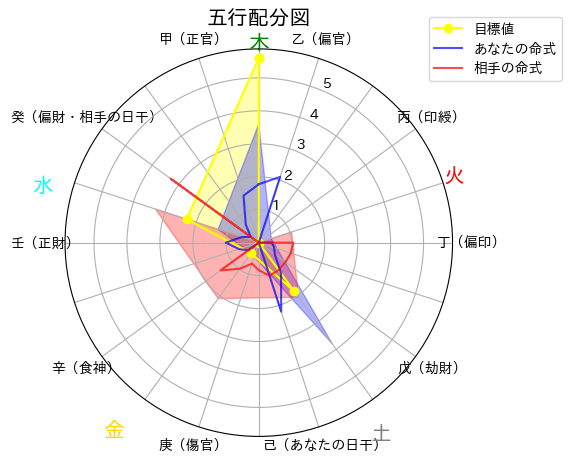





相手の命式（参考）
      通変星    天干    地支    蔵干本気    通変星    蔵干中気    通変星    蔵干余気    通変星
----  --------  ------  ------  ----------  --------  ----------  --------  ----------  --------
年柱  比肩      癸      酉      辛          偏印      ‐                     庚          印綬
月柱  正官      戊      午      丁          偏財      ‐                     己          偏官
日柱            癸      酉      辛          偏印      ‐                     庚          印綬
時柱  比肩      癸      丑      己          偏官      辛          偏印      癸          比肩

格　局：偏官格
偉業と功績を上げる英雄

身強弱：身強

用神：正官、偏官（土）
喜神：偏財（火）
忌神：比肩（水）
仇神：印綬、偏印（金）

特記事項：日干強弱値：5、格局は月干で判定


In [ ]:
#@title 相性診断
#@markdown #####あらかじめ本人の「四柱推命判定」を行った後に実行してください。（時間が経っている場合、無効になっていることがあります）
#@markdown #####以下に、相手の生年月日等を「四柱推命判定」と同じ要領で記入してください。

#入力欄
yearA = 1994 #@param{type:"number"}
monthA = "5" #@param[1,2,3,4,5,6,7,8,9,10,11,12]{allow-input:false}
dayA = "25" #@param[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]{allow-input:false}
hourA = "\u51FA\u751F\u6642\u523B\u4E0D\u660E" #@param["出生時刻不明",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]{allow-input:false}
minuteA = 00 #@param{type:"number"}
birthplaceA = "\u718A\u672C"#@param{type:"string"}
#@markdown #####出生地を都道府県（漢字）で記入してください。
sexA = "\u5973\u6027"#@param ["男性", "女性"]{allow-input:false}
#@markdown #####保存済みの人の場合、以下に名前を記入してください（上は無視されます）。
name_of_personA = "\u307B\u3093\u3053\u3093\u3055\u3093"#@param{type:"string"}
#@markdown #####「出生時刻不明」の場合、次の中で最も当てはまる数字を選んでください（これによる結果はやや不正確なものとなる可能性があります。）
#@markdown #####１：つむじが体の正中線上にある。または仰向けに寝ることが多い
#@markdown #####２：つむじが体の正中線から少しそれる。または横向きに寝ることが多い
#@markdown #####３：つむじが体の正中線から大きくそれる、あるいは複数ある。またはうつぶせに寝ることが多い
choice = "1" #@param [1,2,3]{allow-input:false}
#@markdown
#ここまで

#名前指定の場合
nameList = targetstable.index.to_list()
nameUse = False #名前指定を使ったかのbool
if name_of_personA in nameList:
  contentsTable = targetstable.loc[name_of_personA]
  yearA = int(contentsTable["年"])
  monthA = contentsTable["月"]
  dayA = contentsTable["日"]
  hourA = contentsTable["時"]
  minuteA = int(contentsTable["分"])
  birthplaceA = contentsTable["場所"]
  sexA = contentsTable["性別"]
  nameUse = True

monthA = int(monthA)
dayA = int(dayA)

a = ""
for i in placeList: #座標テーブルの表記に修正
  if birthplace in i:
    a = i
if  a == "":
  print("エラー：出生地に生まれた都道府県を漢字で正しく記入してください。")
  sys.exit()
birthplaceA = a

#ここに時差修正をいれる(時刻不明の場合以外)
if hourA != "出生時刻不明":
  hourA = int(hourA)
  birthdayA = ja.localize(datetime.datetime(yearA,monthA,dayA,hourA,minuteA))
  attitude = placetable.loc[birthplaceA, "経度"]
  attitude -= 135 #経度差
  if attitude > 0: #子午線より東側の計算
    hourdelta = datetime.timedelta(hours = attitude / 15) #時刻の太陽時差修正
    birthdayA = birthdayA + hourdelta
  else: #西側の計算
    hourdelta = datetime.timedelta(hours = (abs(attitude) / 15)) #時刻の太陽時差修正
    birthday = birthday - hourdelta
  birthdayA = birthdayA + hourdelta
  birthdayA.replace(tzinfo = pytz.timezone("Etc/GMT+9")) #昔のサマータイム修正
else:
  birthdayA = ja.localize(datetime.datetime(yearA,monthA,dayA,0,0))
#ここまで

tenkanA = [-1]  * 4 #天干を入れるリスト(年月日時)
chishiA = [-1]  * 4 #地支を入れるリスト(年月日時)

#ここから年干支を求める
if birthdayA.date() - sekki(yearA,2).date() < datetime.timedelta(days = 0 ):
  yearA -= 1
a = yearA - 1924
tenkanA[0] = jikkan(a)
chishiA[0] = junishi(a)
#年干支ここまで

#ここから月干支を求める
if birthdayA.date() - sekki(yearA,monthA).date() < datetime.timedelta(days = 0):
  monthA -= 1
monthAnum = (yearA - 1924) * 12 + monthA
tenkanA[1] = jikkan(monthAnum)
chishiA[1] = junishi(monthAnum)
#月干支ここまで

#ここから日干支を求める
a = birthdayA.date() - datetime.date(1924,2,15)
nikkanNum = a.days
tenkanA[2] = jikkan(nikkanNum)
chishiA[2] = junishi(nikkanNum)
#日干支ここまで

conjection = False
#ここから時柱検索
if hourA == "出生時刻不明":
  conjection = True
  jityuList = [] #各時柱を格納するリスト
  if choice == 1:
    hourList = (0, 6, 12, 18, 23)
  elif choice == 2:
    hourList = (4, 10, 16, 22)
  else:
    hourList = (2, 8, 14, 20)
  for hourChoice in hourList:
    birthdayA = ja.localize(datetime.datetime(yearA,monthA,dayA,hourChoice,0))
    b = datetime.timedelta(hours = birthdayA.hour, minutes = birthdayA.minute, seconds = birthdayA.second)
    b = ((b.total_seconds()// 60) + ((nikkanNum % 5) * 12 * 120 + 60)) // 120
    b = math.ceil(b)
    tenkanA[3] = jikkan(b)
    chishiA[3] = junishi(b)
    tenkanA, kangoFlagsA, loglist = kango(tenkanA, chishiA, loglist) #干合を計算
    jityuList.append([tuhensei(tenkanA[2],tenkanA[3]), tuhensei(tenkanA[2],jikkan(chishiA[3][6]))]) #時柱の通変星を格納
  #ここから選択
  print("次のなかで、後輩、部下、子供その他自分より目下の人との関係について最も当てはまるものを選んでください。")
  for i in range(len(jityuList)):
    a = ["",""]
    for j in range(len(jityuList[i])):
      if jityuList[i][j][0] == "比肩":
        a[j] = "自分の友人のように親しく"
      elif jityuList[i][j][0] == "劫財":
        a[j] = "自分の弟のように"
      elif jityuList[i][j][0] == "食神":
        a[j] = "自分のパートナーのように愛情をもって"
      elif jityuList[i][j][0] == "傷官":
        a[j] = "自分の指導すべき対象として批判的に"
      elif jityuList[i][j][0] == "偏財":
        a[j] = "ある種の交渉相手として社交的に"
      elif jityuList[i][j][0] == "正財":
        a[j] = "自分の仕事の一部として"
      elif jityuList[i][j][0] == "偏官":
        a[j] = "競争相手として気を抜かずに"
      elif jityuList[i][j][0] == "正官":
        a[j] = "自分の管理対象として"
      elif jityuList[i][j][0] == "偏印":
        a[j] = "インスピレーションを与える存在として興味深く"
      elif jityuList[i][j][0] == "印綬":
        a[j] = "自分が学ぶべき相手として敬意をもって"
    if a[0] == a[1]:
      print(f"{str(i + 1)}：ほぼ全般的に{a[0]}扱っている")
    else:
      print(f"{str(i + 1)}：{a[0]}、そうでないときは、{a[1]}扱っている")
  while True:
    answer = input("ここに当てはまる数字を入力してください") #選択結果を入れる
    if int(answer) < 0 or int(answer) > len(hourList):
      print("エラー：選択肢の中の数字を半角数字で入力してください")
    else:
      break
  hourA = hourList[int(answer) - 1]
  #ここから時差に基づく分の修正
  birthdayA = pytz.timezone("Etc/GMT+9").localize(datetime.datetime(yearA,monthA,dayA,hourA,5))
  attitude -= 135 #経度差
  if attitude > 0: #子午線より東側の計算
    hourdelta = datetime.timedelta(hours = attitude / 15) #時刻の太陽時差修正
    birthdayA = birthdayA - hourdelta
  else: #西側の計算
    hourdelta = datetime.timedelta(hours = (abs(attitude) / 15)) #時刻の太陽時差修正
    birthdayA = birthdayA + hourdelta

#ここから時干支を求める
b = datetime.timedelta(hours = birthdayA.hour, minutes = birthdayA.minute, seconds = birthdayA.second)
b = ((b.total_seconds()// 60) + ((nikkanNum % 5) * 12 * 120 + 60)) // 120
b = math.ceil(b)
tenkanA[3] = jikkan(b)
chishiA[3] = junishi(b)
#時干支ここまで

loglist = []#パロメーター等を格納するリスト
tenkan, kangoFlags, loglist = kango(tenkan, chishi, loglist) #干合を計算
tenkanA = tuple(tenkanA)
chishiA = tuple(chishiA)

#ここから各通変星を求める
tuhenseiA_list = [tenkanA[i] for i in range(len(tenkanA)) if i != 2]

for i in range(4,len(chishiA[0])):
  for e in chishiA:
    if e[i] == -1:
      tuhenseiA_list.append(0)
    else:
      tuhenseiA_list.append(jikkan(e[i]))
a = tenkanA[2]
#通変星ここまで

#ここから身強弱判定
scoreA = 0 #ここに身強弱数値入れる
a = tenkanA[2][2]
if a == chishiA[1][3]: #当旺
  scoreA += 7
if a == chishiA[1][3] + 72: #次旺
  scoreA += 6
scoreAlist1 = chishiA #地支
for i in scoreAlist1:
  if i[3] == a:
    scoreA += 3
  elif i[3] + 72 == a:
    scoreA += 2
  else:
    scoreA -= 2
scoreAlist2 = list(tenkanA) #天干
del scoreAlist2[2]
for i in scoreAlist2:
  if i[2] == a:
    scoreA += 2
  elif i[2] + 72 == a:
    scoreA += 1
  else:
    scoreA -= -1

for i in kaikyokulib: #会局を調べる
  if i[2:] in chishiA and i[1] == tenkanA[3][2]:
    scoreA += 2
    if chishiA[1] in i[2:]:#月支と一致していれば追加
      scoreA += 1

if (a - chishiA[1][3] + 360) % 360 == 144: #失令
  scoreA -= 4
loglist.append(f"日干強弱値：{scoreA}")
if scoreA > 10:
  kyojakuA = "極身強"
elif scoreA < -10:
  kyojakuA = "極身弱"
elif scoreA > 0:
  kyojakuA = "身強"
elif scoreA < 0:
  kyojakuA = "身弱"
else:
  kyojakuA = "中和"
#身強弱ここまで


#ここから格局判定
kakkyokuAnm = ""  #一般格局
nikkan = list(tenkanA[2])
if nikkan[2] == 144:
  nikkan[2] = 72

if nikkan[2] == chishiA[1][3]:
  if nikkan[1] % 2 == chishiA[1][1] % 2:
    kakkyokuAnm = "建禄"
  elif nikkan[1] % 2 == 0:
    kakkyokuAnm = "月刃"
else:
  for i in reversed(range(4,len(chishiA[1]))):
    if kakkyokuAnm != "":
      break
    if tenkanA[1][2] == jikkan(chishiA[1][i])[2]:
      kakkyokuAnm = tuhensei(tenkanA[2],jikkan(chishiA[1][i]))[0]
      loglist.append("格局は月干で判定")
      break
  for i in reversed(range(4,len(chishiA[1]))):
    if kakkyokuAnm != "":
      break
    if jikkan(chishiA[1][i])[2] == tenkanA[0][2] or jikkan(chishiA[1][i])[2] == tenkanA[3][2]:
       kakkyokuAnm = tuhensei(tenkanA[2],jikkan(chishiA[1][i]))[0]
       loglist.append("格局は年・時干で判定")
       break
if kakkyokuAnm == "":  #蔵干深浅判定
  if birthdayA.date() - sekki(yearA,monthA).date() < datetime.timedelta(days = 0):
    monthA = -1
  nissu = birthdayA.date() - sekki(yearA,monthA - 1).date()
  nissu = int(nissu.days)
  loglist.append("格局は蔵干深浅で判定")
  if tuhensei(tenkanA[2],zokan(chishiA[1],nissu))[1] == "比肩":
    kakkyokuAnm = "建禄"
  elif tuhensei(tenkanA[2],zokan(chishiA[1],nissu))[1] == "劫財":
    kakkyokuAnm = "月刃"
  else:
    kakkyokuAnm = tuhensei(tenkanA[2],zokan(chishiA[1],nissu))[0]

tuhenseiA_list2 = [tuhenseiA_list[i] for i  in range(len(tuhenseiA_list)) if i <= 3 or i >= 12]#天干および蔵干本気のみの通変星リスト
tuhenseiA_score = 0
if scoreA > 10:  #極身強の特別格局
  for i in tuhenseiA_list2:
    tuhenseiA_score += i[2]
  tuhenseiA_score //= len(tuhenseiA_list2)
  if tuhenseiA_score == 0:
    kakkyokuAnm = "専旺"
  elif tuhenseiA_score < 144:
    kakkyokuAnm = "従旺"
  else:
    kakkyokuAnm = "従強"

if scoreA < -10:  #極身弱の特別格局
  for i in range(tuhenseiA_list2):
    tuhenseiA_list2[i] = tuhenseiA_list2[i][2]
  if tuhenseiA_list2.count(72) > tuhenseiA_list2.count(144) and tuhenseiA_list2.count(72) > tuhenseiA_list2.count(216):
    kakkyokuAnm = "従児"
  elif tuhenseiA_list2.count(144) > tuhenseiA_list2.count(72) and tuhenseiA_list2.count(144) > tuhenseiA_list2.count(216):
    kakkyokuAnm = "従財"
  elif tuhenseiA_list2.count(216) > tuhenseiA_list2.count(144) and tuhenseiA_list2.count(216) > tuhenseiA_list2.count(72):
    kakkyokuAnm = "従殺"
  else:
    kakkyokuAnm = "従勢"
#格局ここまで

#ここから神判定
kakkyokuA = kakkyokuAnm
if kakkyokuAnm == "専旺":
  kakkyokuA = "従旺"
common_tuhenseiA = collections.Counter(tuhenseiA_list2).most_common()#最多通変星を求める
i = common_tuhenseiA[0][1]
common_tuhenseiA = [common_tuhenseiA[a] for a in range(len(common_tuhenseiA)) if common_tuhenseiA[a][1] == i]
if len(common_tuhenseiA) == 1:
  tuhenseiA_mein = tuhensei(tenkanA[2],common_tuhenseiA[0][0])[1]
elif tuhenseiA_list2[5] in common_tuhenseiA:#最多通変星が複数ある場合、月支を優先する。
  tuhenseiA_mein = tuhensei(tenkanA[2],tuhenseiA_list[5][1])[1]
else:#最多通変星が複数あり場合、月支が含まれない場合、地支を重視する。
  tuhenseiA_list3 = tuhenseiA_list2
  for i in range(len(tuhenseiA_list2)):
    if i > 3:
      tuhenseiA_list3.append(tuhenseiA_list2[i])
  common_tuhenseiA = collections.Counter(tuhenseiA_list3).most_common()
  i = common_tuhenseiA[0][1]
  common_tuhenseiA = [common_tuhenseiA[a] for a in range(len(common_tuhenseiA)) if common_tuhenseiA[a][1] == i]
  if tuhenseiA_list2[5] in common_tuhenseiA:
    tuhenseiA_mein = tuhensei(tenkanA[2],tuhenseiA_list[5][1])[1]
  else:
    tuhenseiA_mein = tuhensei(tenkanA[2],common_tuhenseiA[0][0])[1]
kamiAbase = yojin(kakkyokuA, kyojakuA, tuhenseiA_mein)
kamiA = []
#ここから神のいる方をとる（どっちもいるなら多い順に出す）
for i in range(len(kamiAbase)):
  kamiAangle = kamiAbase[i][2]
  kamiA_list = [a for a in tuhenseiA_list2 if tuhensei(tenkanA[2],a)[2] == kamiAangle]
  if kamiA_list == []:
    kamiA_list = [a for a in tuhenseiA_list if a != 0]
    kamiA_list = [a for a in kamiA_list if tuhensei(tenkanA[2],a)[2] == kamiAangle]
    if kamiA_list == []: #どれでもなければ該当する両方を出す（基本はないはずだが）
      kamiA_list = [jikkan(a) for a in range(10) if tuhensei(tenkanA[2],jikkan(a))[2] == kamiAangle]
      loglist.append(f"{kaminame[i]}は命式に該当なし")
  kamiA_list = collections.Counter(kamiA_list).most_common()
  kamiA_list = [tuhensei(tenkanA[2],a[0]) for a in kamiA_list]
  kamiA.append(kamiA_list)
#神判定ここまで

#相性表ここから
aisyoList = [] #相性表を格納するリスト
#命式の陰陽率を出す
onmyo = 0 #自分の陰陽率
onmyoA = 0 #相手の陰陽率
for i in list(tenkan) + list(chishi):
  if i[1] % 2 == 0:
    onmyo += 1
  else:
    onmyo -= 1
for i in tenkanA + chishiA:
  if i[1] % 2 == 0:
    onmyoA += 1
  else:
    onmyoA -= 1
a = []
for i in [onmyo, onmyoA]:
  if i > 0:
    a.append("陽")
  elif i < 0:
    a.append("陰")
  else:
    a.append("中和")
if onmyo * onmyoA < 0:
  a.append("調和のとれた相性")
elif onmyo * onmyoA > 0:
  a.append("反発しあう相性")
elif onmyo == onmyoA:
  a.append("接点の少ない相性")
else:
  a.append("中和でない方に引きずられる相性")
aisyoList.append(a)
#陰陽ここまで
a = [kyojaku, kyojakuA]#ここから身強弱の相性
if score * scoreA < 0:
  a.append("バランスの取れた相性。夫婦的な関係")
elif score > 0:
  a.append("パワフルな関係。戦友的。ビジネスパートナーに適")
else:
  a.append("保守的で安定した相性。穏やかな関係")
aisyoList.append(a)
#身強弱ここまで
a = []#ここから吉凶神相性判定
for h in [tuhenseiA_list, tuhensei_list]:
  if h == tuhensei_list:
    j = kamiA
  else:
    j = kami
  b = 0
  for i in range(len(h)):
    if h[i] in list(itertools.chain.from_iterable(j[0])):
      c = 1
    elif h[i] in list(itertools.chain.from_iterable(j[1])):
      c = 0.5
    elif h[i] in list(itertools.chain.from_iterable(j[2])):
      c = -0.8
    elif h[i] in list(itertools.chain.from_iterable(j[3])):
      c = -0.4
    else:
      c = 0
    if i < 4:
      d = 1
    elif i < 8:
      d = 0.1
    elif i < 12:
      d = 0.4
    else:
      d = 0.5
    b += c * d
  a.append(b)
aisyoList.append(a)
#吉凶神判定ここまで
a = [chishi[2][0], chishiA[2][0]] #ここから日支判定
if chishi[2] == chishiA[2]:
  a.append("")
elif math.tan(math.radians(chishi[2][2])) == math.tan(math.radians(chishiA[2][2])):
  a.append("支合（最高の相性）")
elif abs(chishi[2][2] - chishiA[2][2]) == 180:
  a.append("支沖（刺激的な相性")
else:
  for i in kaikyokulib:
    if chishi[2] in i and chishiA[2] in i:
      a.append(f"{i[0]}（良い相性）")
      break
if len(a) < 3:
  a.append("")
aisyoList.append(a)
#日支判定ここまで

#ここまで出力
df_aisyo = pd.DataFrame(aisyoList, index = pd.Index(["陰陽","身強弱","吉凶神","日支"]),
                  columns = pd.Index(["あなたの命式","相手の命式","判定"]))
print("相性診断結果")
print(tabulate(df_aisyo,headers = df_aisyo.columns,tablefmt='simple', showindex=True))
print("※吉凶神判定は、他方の命式にどの吉凶神が含まれているかを示しています。")
print()
#出力ここまで

#日干相性出力
print("日干相性判定")
print(f"あなたの日干：{tenkan[2][0]}、相手の日干：{tenkanA[2][0]}")
if tenkan[2][1] < tenkanA[2][1]:
  a = tenkan[2][0] + tenkanA[2][0]
else:
  a = tenkanA[2][0] + tenkan[2][0]
b = typewrite("aisyo", a, "相性", False)
print(f"相性：{b}")
print("良いところ")
typewrite("aisyo", a, "良いところ", True)
print("悪いところ")
typewrite("aisyo", a, "悪いところ", True)

#ここから五行判定
fivelevelsA = {0:0.0, 72:0.0, 144:0.0, 216:0.0, 288:0.0}#各五行の強さを格納するDict変数
jikkanlevelsA = [0] * 10 #十干の強さを格納するリスト
for i in tenkanA: #天干の五行を1足す
  fivelevelsA[i[2]] += 1
  jikkanlevelsA[i[1]] += 1
for i in chishiA: #地支の五行を１足す（蔵干も足す）
  for j in range(1,31):
    fivelevelsA[zokan(i,j)[2]] += 1/30
    jikkanlevelsA[zokan(i,j)[1]] += 1/30
    if i == chishiA[1]: #月支なら重視して足す
      fivelevelsA[zokan(i,j)[2]] += 1/60
      jikkanlevelsA[zokan(i,j)[1]] += 1/60
shityu = [0,0,0,0] #支沖の計算（合わせて地支の五行を削る）
for i in range(3):
  if abs(chishiA[i][2] - chishiA[i+1][2]) == 180:
    shityu[i] = 1
    shityu[i+1] = 1
for i in range(4):
  if shityu[i] == 1:
    if chishiA[i][3] == 144: #土同士の支沖は土の気を足す
      fivelevelsA[chishiA[i][3]] += 0.5
      loglist.append(f"{chishiA[i][0]}支沖")
    else:
      fivelevelsA[chishiA[i][3]] -= 0.5
      loglist.append(f"{chishiA[i][0]}支沖")
shigo = [1,1,1,1]#ここから支合の計算（合わせて地支の五行も足す）
for i in range(3):
  if math.tan(math.radians(chishiA[i][2])) == math.tan(math.radians(chishiA[i+1][2])):
    if kangoFlags[i] == 0 or (kangoFlags[i] == 1 and abs(tenkanA[i][1] - tenkanA[i+1][1]) == 5): #天干が他柱と干合してない（この組み合わせなら可）
      shigo[i] *= -1 #妬合したら反転して元に戻る
      shigo[i+1] *= -1
for i in range(3):
  if shigo[i] == -1 and shityu[i] == 0: #支沖してない
    if chishiA[i][0] + chishiA[i+1][0] in ["子丑"] and tenkanA[i][0] + tenkanA[i+1][0] in ["戊己丙丁"]:
      fivelevelsA[144] += 1 #合化土
      loglist.append(f"{chishiA[i][0]}{chishiA[i+1]}合化土")
    if chishiA[i][0] + chishiA[i+1][0] in ["亥寅"] and tenkanA[i][0] + tenkanA[i+1][0] in ["甲乙壬癸"]:
      fivelevelsA[0] += 1 #合化木
      loglist.append(f"{chishiA[i][0]}{chishiA[i+1]}合化木")
    if chishiA[i][0] + chishiA[i+1][0] in ["卯戌午未"] and tenkanA[i][0] + tenkanA[i+1][0] in ["甲乙丙丁"]:
      fivelevelsA[72] += 1 #合化火
      loglist.append(f"{chishiA[i][0]}{chishiA[i+1]}合化火")
    if chishiA[i][0] + chishiA[i+1][0] in ["辰酉"] and tenkanA[i][0] + tenkanA[i+1][0] in ["庚辛戊己"]:
      fivelevelsA[216] += 1 #合化金
      loglist.append(f"{chishiA[i][0]}{chishiA[i+1]}合化金")
    if chishiA[i][0] + chishiA[i+1][0] in ["巳申"] and tenkanA[i][0] + tenkanA[i+1][0] in ["庚辛壬癸"]:
      fivelevelsA[288] += 1 #合化水
      loglist.append(f"{chishiA[i][0]}{chishiA[i+1]}合化水")
for i in range(len(kaikyokulib)): #会局による五行を足す
  if kaikyokulib[i][2:] in chishiA:
    fivelevelsA[kaikyokulib[i][1]] += 0.3
    loglist.append(f"{kaikyokulib[i][0]}")
fivelevelsA = sorted(fivelevelsA.items(), key = lambda value:value[1], reverse = True)
#五行配分ここまで

#ここから五行の配分図表示
labelList = ["","乙","","丙","","丁","","戊","","己","","庚","","辛","","壬","","癸","","甲"]
for i in range(len(labelList)):
  if i % 2 == 0:
    continue
  else:
    labelList[i] += "（"
    a = jikkan((i // 2 + 11) % 10)
    if a == tenkan[2]:
      labelList[i] = labelList[i] + "あなたの日干"
    else:
      for p in range(len(tuhenseilib)):
        if (a[2] - tenkan[2][2] + 360) % 360 in tuhenseilib[p]:
          if a[1] % 2 == tenkan[2][1] % 2:
            labelList[i] = labelList[i] + tuhenseilib[p][0]
          else:
            labelList[i] = labelList[i] + tuhenseilib[p+1][0]
          break
    if jikkan((i // 2 + 11) % 10)[1] == tenkanA[2][1]:
      labelList[i] += "・相手の日干"
    labelList[i] += "）"

plotlistA = [0] * 5 #相手の五行を追加
for i in fivelevelsA:
  plotlistA[i[0]//72] = i[1]
plotlistA.append(plotlistA[0])

lineListA = [0] * 20 #十干の数値を正規化
for i in range(len(jikkanlevelsA)):
  lineListA[((i + 9) % 10) * 2 + 1] = jikkanlevelsA[i]
for i in range(len(lineListA)): # 仮の地点の値を中間値にしてなめらかにする。
  if i % 2 == 0:
    a = np.sqrt(lineListA[(i + 19) % 20] * lineListA[(i + 21) % 20])
    lineListA[i] = a
lineListA.append(lineListA[0])

angles = np.linspace(start = 0, stop = 2*np.pi, num = len(plotlist),  endpoint = True)
anglesA = np.linspace(start = 0, stop = 2*np.pi, num = len(labelList)+1,  endpoint = True)
fig, ax = plt.subplots(1,1,figsize = (5,6), subplot_kw={"projection":"polar"})
ax.plot(angles, idealpowers, "o-", color="yellow", label = "目標値")
ax.fill(angles, idealpowers, alpha= 0.3, color = "yellow")
ax.fill(angles, plotlist, alpha= 0.3, color = "blue")
ax.plot(anglesA, lineList, "-",alpha= 0.7, color="blue", label = "あなたの命式")
ax.fill(angles, plotlistA, alpha= 0.3, color = "red")
ax.plot(anglesA, lineListA, "-",alpha= 0.7, color="red", label = "相手の命式")
ax.set_thetagrids(anglesA[:-1]*180/np.pi, labelList, fontsize=10)
ax.text(0.5 + np.sin(np.radians(357))/2,0.5+ np.cos(np.radians(357))/2,"木",transform = ax.transAxes, color = "green", fontsize = 15)
ax.text(0.5 + np.sin(np.radians(72))/2,0.5+ np.cos(np.radians(72))/2,"火",transform = ax.transAxes, color = "red", fontsize = 15)
ax.text(0.5 + np.sin(np.radians(145))/2,0.4+ np.cos(np.radians(145))/2,"土",transform = ax.transAxes, color = "gray", fontsize = 15)
ax.text(0.4 + np.sin(np.radians(217))/2,0.4+ np.cos(np.radians(217))/2,"金",transform = ax.transAxes, color = "gold", fontsize = 15)
ax.text(0.4 + np.sin(np.radians(285))/2,0.5+ np.cos(np.radians(285))/2,"水",transform = ax.transAxes, color = "cyan", fontsize = 15)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("五行配分図", fontsize = 15)
ax.legend(bbox_to_anchor=(1, 1, 0.3 ,0.1), loc='upper right', ncol=1)
plt.show()
print()
print()
#五行の配分図表示ここまで

#命式と通変星を出力
print()
print()
outputlist = [] #出力を格納するリスト
for i in range(4):
  a = []
  if i == 2:
    a.append("")
  else:
    if i < 2:
      a.append(f"{tuhensei(tenkanA[2],tuhenseiA_list[i])[0]}")
    else:
      a.append(f"{tuhensei(tenkanA[2],tuhenseiA_list[i - 1])[0]}")
  a.append(f"{tenkanA[i][0]}")
  a.append(f"{chishiA[i][0]}")
  a.append(f"{jikkan(chishiA[i][6])[0]}")
  a.append(f"{tuhensei(tenkanA[2],tuhenseiA_list[i+11])[0]}")
  if chishiA[i][5] == -1:
    a.append("‐")
    a.append("")
  else:
    a.append(f"{jikkan(chishiA[i][5])[0]} ")
    a.append(f"{tuhensei(tenkanA[2],tuhenseiA_list[i+7])[0]} ")
  a.append(f"{jikkan(chishiA[i][4])[0]} ")
  a.append(tuhensei(tenkanA[2],tuhenseiA_list[i+3])[0])
  outputlist.append(a)
df = pd.DataFrame(outputlist, index = pd.Index(["年柱","月柱","日柱","時柱"], name="命式"),
                  columns = pd.Index(["通変星","天干","地支","蔵干本気","通変星","蔵干中気","通変星","蔵干余気","通変星"]))
print("相手の命式（参考）")
print(tabulate(df,headers = df.columns,tablefmt='simple', showindex=True))
print()
#格局、身強弱の出力
print(f"格　局：{kakkyokuAnm}格") #格局の出力
if ("従"not in kakkyokuAnm) or (kakkyokuAnm == "専旺"):
  typewrite("kakkyoku",kakkyokuAnm, "端的に", True)
print()
print(f"身強弱：{kyojakuA}") #身強弱の出力
print()
#吉凶神の出力
kaminame = ["用神","喜神","忌神","仇神"]
for i in range(4):
  a = kaminame[i] + "："
  for j in range(len(kamiA[i])):
    a += kamiA[i][j][0]
    if j < len(kamiA[i]) - 1:
      a += "、"
  a += "（"
  a += fivepower[(tenkanA[2][2] + kamiA[i][0][2]) % 360]
  a += "）"
  print(a)
print()
#出力ここまで

#ここまでのログを表示
logprint = "特記事項："
for i in loglist:
  logprint += i
  if i != loglist[-1]:
    logprint += "、"
print(logprint)

#新しい検索のときに追加を確認
if nameUse == False:
  answer = input("この生年月日を保存しますか？（はい/いいえ）")
  if answer == "はい":
    while True:
      answer = input("保存する名前を記入してください。")
      if answer in nameList:
        overwrite = input(f"すでに{answer}は登録されています。上書きしますか？（はい／いいえ）")
        if overwrite == "はい":
          break
      else:
        break
    if conjection == True:
      conjector = "時刻は推測による"
    else:
      conjector = ""
    targetstable.loc[answer] = [yearA, monthA, dayA, hourA, minuteA, birthplaceA, sexA, conjector]
    targetstable.to_csv("/content/drive/MyDrive/Colab/4suimeiData/targets.csv")
    print(f"正常に保存されました。保存名：{answer}")
